## Import the required libraries and dataset

**Download the dataset from [here](http://users.dimi.uniud.it/~massimo.franceschet/ns/syllabus/make/assortative/assortative.html)**

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
E = pd.read_csv(r'dolphin_edges.csv')
V = pd.read_csv(r'dolphin_nodes.csv')

In [3]:
E.head()

,x,y
0,4,9
1,6,10
2,7,10
3,1,11
4,3,11


In [4]:
V.head()

,name,sex
0,Beak,M
1,Beescratch,M
2,Bumper,M
3,CCL,F
4,Cross,M


In [5]:
for i in range(len(E)):
    E['x'][i] = V['name'][E['x'][i] - 1]
    E['y'][i] = V['name'][E['y'][i] - 1]

<ipython-input-5-00c46e451a77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['y'][i] = V['name'][E['y'][i] - 1]
e:\nlp\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
E

,x,y
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish
...,...,...
154,Topless,Zap
155,Ripplefluke,Zig
156,Bumper,Zipfel
157,SN4,Zipfel


In [7]:
G = nx.from_pandas_edgelist(E, source='x', target='y')

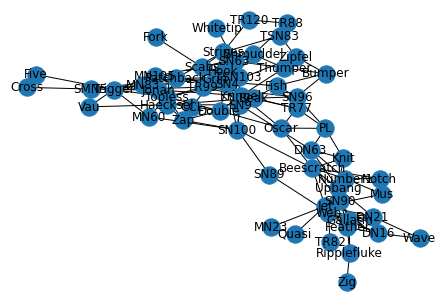

In [8]:
nx.draw(G, with_labels=True)

## Common Neighbors

In [9]:
# targets not connected directly (pair of nodes)
targets = nx.non_edges(G)
common_neighbours = [(e[0], e[1],
                     len(list(nx.common_neighbors(G, e[0], e[1]))))
                    for e in targets]
sorted(common_neighbours, key=lambda x: x[2], reverse=True)

[('Hook', 'Stripes', 4),
 ('Haecksel', 'Trigger', 4),
 ('SN63', 'SN4', 4),
 ('SN63', 'TR99', 4),
 ('MN83', 'MN105', 4),
 ('Upbang', 'Jet', 4),
 ('Upbang', 'Feather', 4),
 ('SN4', 'TR99', 4),
 ('SN90', 'Jet', 4),
 ('SN90', 'DN21', 4),
 ('DN16', 'DN21', 4),
 ('Hook', 'Shmuddel', 3),
 ('Hook', 'SN9', 3),
 ('Haecksel', 'Grin', 3),
 ('Haecksel', 'Patchback', 3),
 ('SN63', 'Shmuddel', 3),
 ('SN63', 'SN9', 3),
 ('MN83', 'TR99', 3),
 ('Shmuddel', 'SN9', 3),
 ('Shmuddel', 'Stripes', 3),
 ('Notch', 'Jet', 3),
 ('Double', 'SN100', 3),
 ('Web', 'Beescratch', 3),
 ('TSN103', 'Scabs', 3),
 ('TSN103', 'Stripes', 3),
 ('SN4', 'Kringel', 3),
 ('SN4', 'Zap', 3),
 ('SN4', 'Patchback', 3),
 ('Scabs', 'Kringel', 3),
 ('Scabs', 'Topless', 3),
 ('Beescratch', 'DN63', 3),
 ('Beescratch', 'Gallatin', 3),
 ('Beescratch', 'Mus', 3),
 ('Kringel', 'Grin', 3),
 ('Kringel', 'Topless', 3),
 ('SN100', 'Topless', 3),
 ('SN9', 'Stripes', 3),
 ('TR99', 'Jonah', 3),
 ('TR99', 'MN105', 3),
 ('Grin', 'Patchback', 3),
 ('Gri

## Jaccard Coefficient

In [10]:
jaccard_coeff = list(nx.jaccard_coefficient(G))
sorted(jaccard_coeff, key=lambda x: x[2], reverse=True)

[('Quasi', 'MN23', 1.0),
 ('Cross', 'Five', 1.0),
 ('DN16', 'DN21', 0.6666666666666666),
 ('SN90', 'DN21', 0.5714285714285714),
 ('MN83', 'MN105', 0.5),
 ('Cross', 'Vau', 0.5),
 ('TR82', 'SN89', 0.5),
 ('Five', 'Vau', 0.5),
 ('SN90', 'DN16', 0.5),
 ('Hook', 'Stripes', 0.4444444444444444),
 ('Upbang', 'Feather', 0.4),
 ('SN90', 'Jet', 0.4),
 ('DN16', 'Ripplefluke', 0.4),
 ('Hook', 'Shmuddel', 0.375),
 ('TSN103', 'Stripes', 0.375),
 ('Beescratch', 'Mus', 0.375),
 ('SN63', 'TR99', 0.36363636363636365),
 ('MN83', 'Vau', 0.3333333333333333),
 ('Quasi', 'Mus', 0.3333333333333333),
 ('Shmuddel', 'Stripes', 0.3333333333333333),
 ('Notch', 'Jet', 0.3333333333333333),
 ('TR120', 'TSN83', 0.3333333333333333),
 ('MN60', 'Cross', 0.3333333333333333),
 ('MN60', 'Five', 0.3333333333333333),
 ('MN60', 'Zap', 0.3333333333333333),
 ('Upbang', 'Jet', 0.3333333333333333),
 ('SN90', 'Ripplefluke', 0.3333333333333333),
 ('MN23', 'Mus', 0.3333333333333333),
 ('Haecksel', 'Trigger', 0.3076923076923077),
 ('SN

## Resource Allocation

In [11]:
RA_idx = list(nx.resource_allocation_index(G))
sorted(RA_idx, key=lambda x: x[2], reverse=True)

[('Haecksel', 'Trigger', 0.9004329004329005),
 ('DN16', 'DN21', 0.878968253968254),
 ('Notch', 'Jet', 0.6583333333333333),
 ('Beescratch', 'Mus', 0.6444444444444444),
 ('SN100', 'Topless', 0.6242424242424243),
 ('Upbang', 'Feather', 0.6027777777777777),
 ('Beescratch', 'DN63', 0.5928571428571429),
 ('Zipfel', 'Stripes', 0.5909090909090909),
 ('Grin', 'Patchback', 0.5595238095238095),
 ('Upbang', 'Jet', 0.5277777777777777),
 ('SN90', 'DN21', 0.5218253968253967),
 ('SN90', 'Jet', 0.503968253968254),
 ('Shmuddel', 'TR120', 0.5),
 ('Web', 'SN100', 0.5),
 ('Stripes', 'TR88', 0.5),
 ('SN63', 'SN4', 0.4928571428571428),
 ('SN4', 'Kringel', 0.47619047619047616),
 ('SN4', 'TSN83', 0.47619047619047616),
 ('SN63', 'TR99', 0.46111111111111114),
 ('Haecksel', 'Grin', 0.4583333333333333),
 ('Web', 'Beescratch', 0.45396825396825397),
 ('Beescratch', 'Gallatin', 0.45396825396825397),
 ('Kringel', 'Topless', 0.4523809523809524),
 ('Upbang', 'PL', 0.45),
 ('Beescratch', 'PL', 0.45),
 ('MN83', 'MN105', 0

## Adamic-Adar Index

In [12]:
adamic_adar_idx = list(nx.adamic_adar_index(G))
sorted(adamic_adar_idx, key=lambda x: x[2], reverse=True)

[('Haecksel', 'Trigger', 2.9317364012342075),
 ('DN16', 'DN21', 2.8926113435351204),
 ('Upbang', 'Feather', 2.1154635213872655),
 ('Notch', 'Jet', 2.012472508149437),
 ('Beescratch', 'Mus', 1.986693774499868),
 ('Upbang', 'Jet', 1.9750269337906414),
 ('SN90', 'DN21', 1.963814645015908),
 ('SN100', 'Topless', 1.9486065526106957),
 ('SN90', 'Jet', 1.930814649609145),
 ('SN63', 'SN4', 1.9087330552060944),
 ('Zipfel', 'Stripes', 1.8597274323132096),
 ('Beescratch', 'DN63', 1.8565807973738442),
 ('SN63', 'TR99', 1.8499543261497624),
 ('MN83', 'MN105', 1.8203448290106674),
 ('SN4', 'TR99', 1.8118671042605898),
 ('Grin', 'Patchback', 1.7933564893654796),
 ('Hook', 'Stripes', 1.7346548246723308),
 ('SN4', 'Kringel', 1.6301195954722452),
 ('Haecksel', 'Grin', 1.5971196000654824),
 ('Web', 'Beescratch', 1.5903528902427813),
 ('Beescratch', 'Gallatin', 1.5903528902427813),
 ('Kringel', 'Topless', 1.5859073112907487),
 ('SN63', 'Shmuddel', 1.5580716067295781),
 ('SN63', 'SN9', 1.5580716067295781),